In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importing dataset

In [3]:
data=pd.read_csv("Wine_clust.csv")

# Making starting of index number as 1 for my confrtness

In [4]:
data.index += 1 

In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.shape

(178, 13)

# This is a small dataset having 178 observations. Also no null values present in this dataset.

In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 1 to 178
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# This dataset only contain integer and float datatype

In [9]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

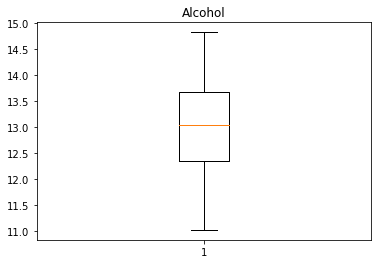

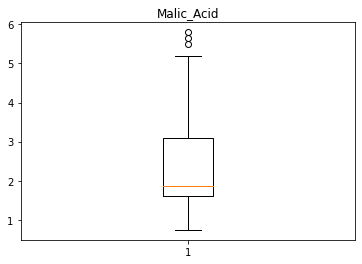

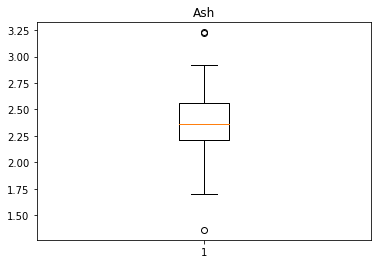

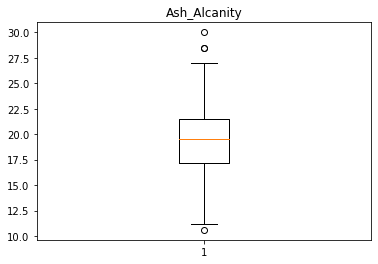

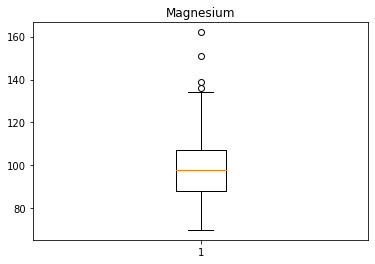

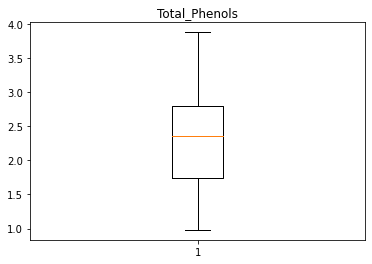

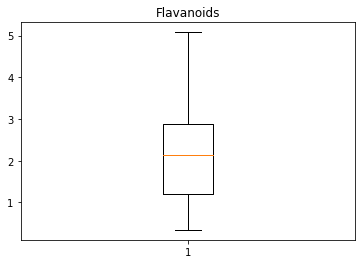

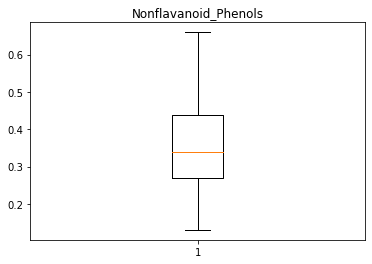

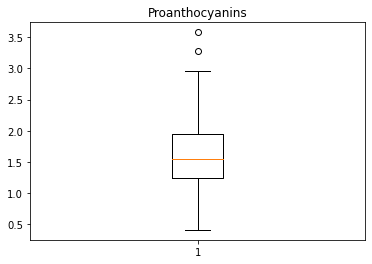

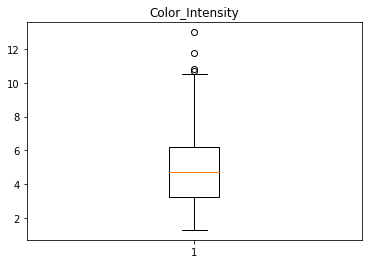

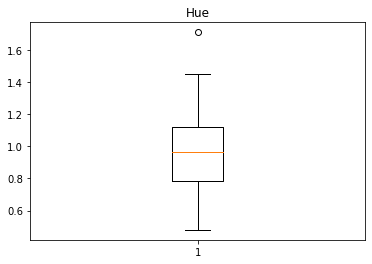

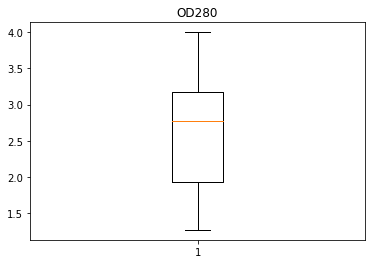

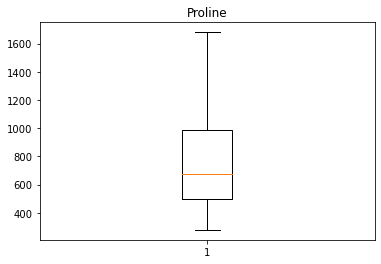

In [10]:
for i in data:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

# outliers are there but given dataset is too small so we are not doing any deletion on outliers. After that we are just checking the correlation. And checking multicorrelation is present or not 

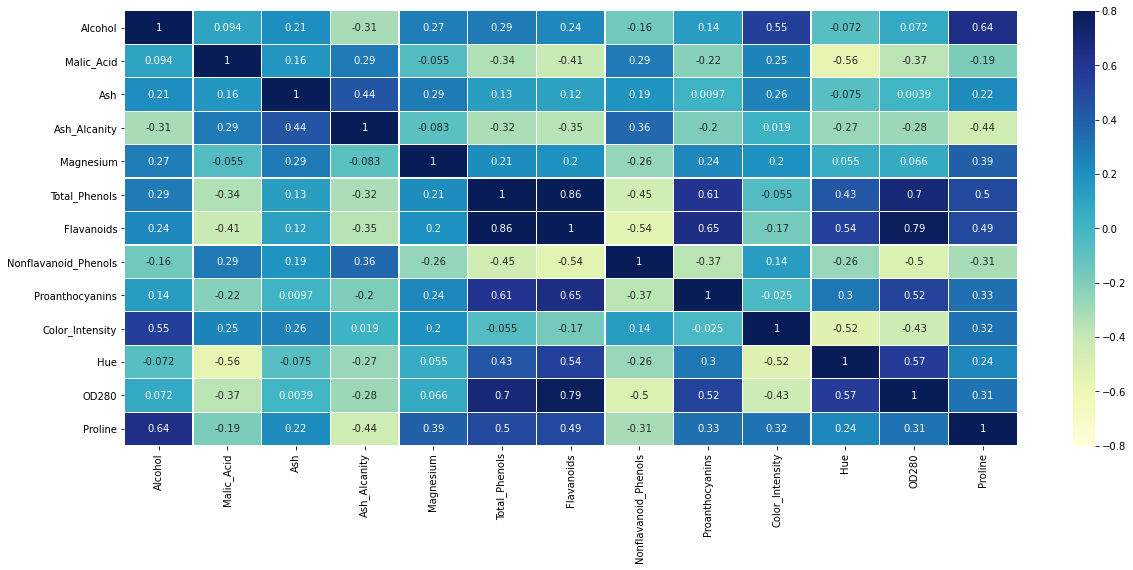

In [11]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.8,vmax=0.8,annot=True,linewidth=0.2,cmap='YlGnBu')

# we are selecting the columns which is suitable for labeling the wine sample units

In [12]:
x=data.iloc[:,[0,10]].values
x

array([[14.23 ,  1.04 ],
       [13.2  ,  1.05 ],
       [13.16 ,  1.03 ],
       [14.37 ,  0.86 ],
       [13.24 ,  1.04 ],
       [14.2  ,  1.05 ],
       [14.39 ,  1.02 ],
       [14.06 ,  1.06 ],
       [14.83 ,  1.08 ],
       [13.86 ,  1.01 ],
       [14.1  ,  1.25 ],
       [14.12 ,  1.17 ],
       [13.75 ,  1.15 ],
       [14.75 ,  1.25 ],
       [14.38 ,  1.2  ],
       [13.63 ,  1.28 ],
       [14.3  ,  1.07 ],
       [13.83 ,  1.13 ],
       [14.19 ,  1.23 ],
       [13.64 ,  0.96 ],
       [14.06 ,  1.09 ],
       [12.93 ,  1.03 ],
       [13.71 ,  1.11 ],
       [12.85 ,  1.09 ],
       [13.5  ,  1.12 ],
       [13.05 ,  1.13 ],
       [13.39 ,  0.92 ],
       [13.3  ,  1.02 ],
       [13.87 ,  1.25 ],
       [14.02 ,  1.04 ],
       [13.73 ,  1.19 ],
       [13.58 ,  1.09 ],
       [13.68 ,  1.23 ],
       [13.76 ,  1.25 ],
       [13.51 ,  1.1  ],
       [13.48 ,  1.04 ],
       [13.28 ,  1.09 ],
       [13.05 ,  1.12 ],
       [13.07 ,  1.18 ],
       [14.22 ,  0.89 ],


# kmeans clustering

125.90139006741568
41.38377005338396
24.68907700031617
18.581717521666672
14.631203657490026
12.3729247056667
10.725349296631302
9.49303265226346
8.326579402699643
7.480624061309692


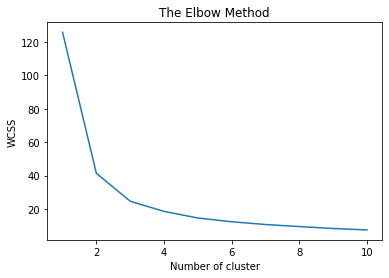

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [14]:
#kmeans
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
type(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

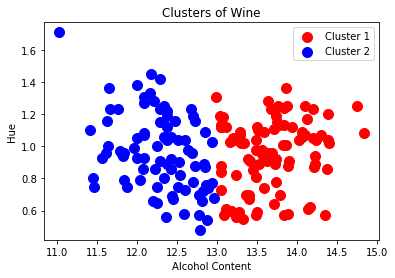

In [15]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
#plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
# plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
# plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.title('Clusters of Wine')
plt.xlabel('Alcohol Content')
plt.ylabel('Hue')
plt.legend()
plt.show()

# Hiearchichal Clustering

# using the dendrogram to find the optimal number of clusters


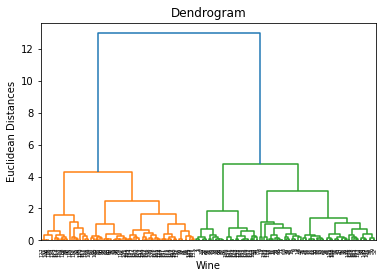

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean Distances')
plt.show()

# The largest line where no horizontally line extended should cut the extended largest line will find the optimum number of clusters.  Here it is 2.

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [28]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

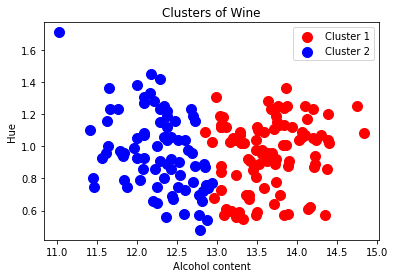

In [19]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Cluster 2')
#plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Cluster 3')
#plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='cyan',label='Cluster 4')
# plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='magenta',label='Cluster 5')
plt.title('Clusters of Wine')
plt.xlabel('Alcohol content')
plt.ylabel('Hue')
plt.legend()
plt.show()

# Both K means clustering and Hiearchichal clustering showing optimum cluster as 2.

# We have amount of alcohol content om the x-axis and Hue in y-axis.  Here Cluster 1 has High Acohol content and Cluster 2 has low Alcohol content which is said to be Cluster 1 as strong wines and Cluster 2 as Weak wines

In [29]:
y_hc=pd.DataFrame(data=y_hc,columns=['wine_type'])

In [32]:
y_hc['wine_type'].unique()

array([0, 1], dtype=int64)

In [33]:
data=pd.concat([data,y_hc],axis=1)

In [35]:
data['wine_type'].unique()

array([ 0.,  1., nan])